In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams
import copy

import matplotlib
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [47]:
path = "/home/mfmezger/data/AI_Clinic_Data/adeno.csv"

df = pd.read_csv(path,)

df.head()

,Unnamed: 0,Patient,Voxels,ADCmean,ADCvariance,ADCsd,ADCmedian,ADCskew,ADCkurt,ADC5p,...,SUV95p,Histologie,G,cT,cN,cM,pT,pN,pM,Stadium
0,0,1,22043.0,1036.693281,103159.047102,321.183821,991.0,0.444463,1.458258,554.0,...,23.458490,Adenokarzinom,x,2b,2,1a,3,0,-,2B
1,1,11,21410.0,868.918169,201928.592930,449.364655,963.0,-0.100914,-0.485107,100.0,...,20.653860,Adenokarzinom,3,4,3,1c,-,-,-,4B
2,2,14,2012.0,842.284791,187625.303089,433.157365,894.5,-0.131017,-0.676121,96.0,...,8.332395,Adenokarzinom,3,1b,0,0,1b,0,0,1A
3,3,19,2823.0,538.541622,99829.517839,315.958095,527.0,0.240297,-0.775088,65.1,...,6.944930,Adenokarzinom,3,1c,1,0,1c,1,NaN,2B
4,4,2,285.0,1022.119298,120040.245417,346.468246,1085.0,-0.682781,0.021971,333.6,...,2.997654,Adenokarzinom,2,1b,1,0,1,0,-,1A


In [48]:
#df = df.drop(["Unnamed: 0", "Patient", "Voxels", "Histologie"], axis=1)
df = df.drop(["Unnamed: 0", "Patient", "Voxels", "G", "cT", "cN", "cM", "pT", "pN", "pM", "Histologie"], axis=1)

In [49]:
df.head()

,ADCmean,ADCvariance,ADCsd,ADCmedian,ADCskew,ADCkurt,ADC5p,ADC95p,SUVmean,SUVvariance,SUVsd,SUVmedian,SUVskew,SUVkurt,SUV5p,SUV95p,Stadium
0,1036.693281,103159.047102,321.183821,991.0,0.444463,1.458258,554.0,1634.0,9.245593,59.497800,7.713482,6.556550,0.700088,-0.742164,0.787713,23.458490,2B
1,868.918169,201928.592930,449.364655,963.0,-0.100914,-0.485107,100.0,1545.0,9.152199,30.889123,5.557798,8.728515,0.773087,0.282314,1.786550,20.653860,4B
2,842.284791,187625.303089,433.157365,894.5,-0.131017,-0.676121,96.0,1503.0,3.036056,6.379938,2.525854,2.292685,1.176332,0.882571,0.392793,8.332395,1A
3,538.541622,99829.517839,315.958095,527.0,0.240297,-0.775088,65.1,1056.0,4.022798,2.616072,1.617428,3.705260,0.561963,-0.559164,1.872217,6.944930,2B
4,1022.119298,120040.245417,346.468246,1085.0,-0.682781,0.021971,333.6,1521.2,1.966807,0.363642,0.603028,1.986070,0.057758,-0.716479,0.966702,2.997654,1A


In [50]:
df.shape

(16, 17)

# Multidimensional Scaling

In [51]:
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

In [52]:
y = df['Stadium']
X = df.drop(["Stadium"], axis=1)
X = preprocessing.normalize(X)
#X = np.array(X)

In [53]:
similarities = euclidean_distances(X)


seed = np.random.RandomState(seed=3)

mds = MDS(n_components=2, max_iter=5000, eps=1e-12, random_state=seed,
                   n_init=10,
                   dissimilarity="precomputed", n_jobs=1, metric=False)
pos = mds.fit_transform(similarities)

In [54]:
df["Stadium"].head()


a = df.index[df['Stadium'] == "2B"].tolist()
b = df.index[df['Stadium'] == "4B"].tolist()
c = df.index[df['Stadium'] == "1A"].tolist()
d = df.index[df['Stadium'] == "4A"].tolist()
e = df.index[df['Stadium'] == "3B"].tolist()


/tmp/ipykernel_22865/1238995354.py:27: RuntimeWarning: divide by zero encountered in true_divide
  similarities = similarities.max() / similarities * 100


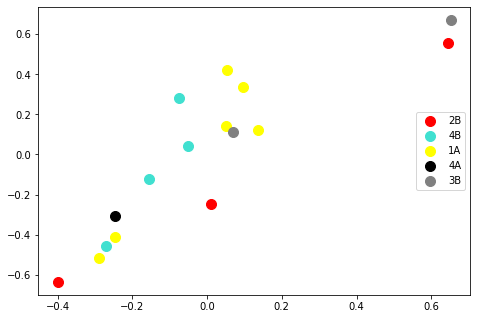

In [55]:

# Plot

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.cm as cm


fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100

# Type of tumor
# todo automate this step
plt.scatter(pos[a, 0], pos[a, 1], s=s, c='r', marker='o', label='2B')
#plt.scatter(pos[a, 0], pos[a, 1], color='navy', alpha=1.0, s=s, lw=1, label='1')
#plt.scatter(pos[b, 0], pos[b, 1], color='turquoise', alpha=1.0, s=s, lw=1, label='2')
#plt.scatter(pos[a, 0], pos[a, 1], color='navy', alpha=1.0, s=s, lw=1, label='2B')
plt.scatter(pos[b, 0], pos[b, 1], color='turquoise', alpha=1.0, s=s, lw=1, label='4B')
plt.scatter(pos[c, 0], pos[c, 1], color='yellow', alpha=1.0, s=s, lw=1, label='1A')
plt.scatter(pos[d, 0], pos[d, 1], color='black', alpha=1.0, s=s, lw=1, label='4A')
plt.scatter(pos[e, 0], pos[e, 1], color='gray', alpha=1.0, s=s, lw=1, label='3B')


plt.legend(scatterpoints=1, loc=5, shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0
plt.show()

In [59]:
def visualize_results(prediction, test):

    cm = confusion_matrix(test, prediction)


    score01 = precision_score(test, prediction, average=None)

    print("Precision Score Klasse: ")
    print(score01)

    score01 = classification_report(test, prediction)

    print("Classification Report: ")
    print(score01)
    

    return cm

In [60]:
def calc_confusion_matrix(prediction, test):
    cm = confusion_matrix(test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
    disp.plot(cmap="Blues")

In [61]:
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11, stratify=y)
np.unique(y, return_counts=True)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [57]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [58]:
prob01 = clf.predict(X_test)
cm = visualize_results(prob01, y_test)

Precision Score Klasse: 
[0.4 0. ]
Classification Report: 
              precision    recall  f1-score   support

           1       0.40      1.00      0.57         2
           2       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/home/mfmezger/anaconda3/envs/lymph-nodule/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mfmezger/anaconda3/envs/lymph-nodule/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mfmezger/anaconda3/envs/lymph-nodule/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

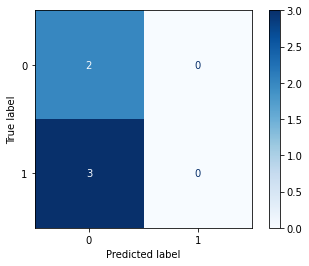

In [33]:
calc_confusion_matrix(prob01, y_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [35]:
prob01 = clf.predict(X_test)
cm = visualize_results(prob01, y_test)

Precision Score Klasse: 
[0.25 0.  ]
Classification Report: 
              precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.00      0.00      0.00         3

    accuracy                           0.20         5
   macro avg       0.12      0.25      0.17         5
weighted avg       0.10      0.20      0.13         5



In [36]:
# skewness + kurtosis intervall sehr eng.
#sns.set(style="ticks")
#cmap =sns.color_palette('tab10', n_colors=3)
#sns.pairplot(df, hue="Stadium")

# Clustering

In [37]:
from sklearn.cluster import KMeans

In [124]:
# dataframe to nparray
y = df["Stadium"]
X = df.drop(["Stadium"], axis=1)
X = preprocessing.normalize(X)


In [125]:



km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

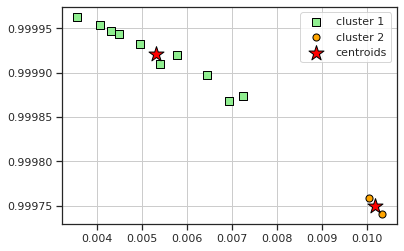

In [126]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [127]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit_predict(X)

In [128]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [129]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

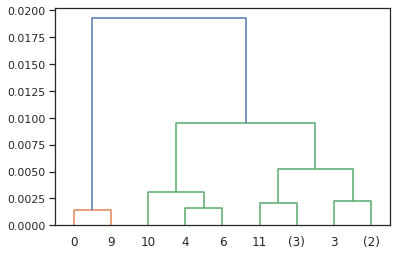

In [130]:
plot_dendrogram(model, truncate_mode="level", p=3)

In [84]:
df["Stadium"].head(15)

0     1
1     2
2     1
3     1
4     1
5     1
6     2
7     1
8     2
9     1
10    2
11    1
12    2
13    2
14    2
Name: Stadium, dtype: int64